## Logistic Regression

Logistic regression with gradient descent available here: https://github.com/animesh-agarwal/Machine-Learning/tree/master/LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
from sklearn.datasets import load_iris

data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/christian/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

y_pred = log_reg.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[37,  0,  0],
       [ 0, 32,  2],
       [ 0,  0, 41]])

### ROC Curve

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

ValueError: multiclass format is not supported

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, log_reg.decision_function(X_test)) 

print("AUC: {:.3f}".format(rf_auc)) 

### Softmax Regression

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)

/home/christian/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

## kNN

In [46]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

In [47]:
from sklearn.neighbors import KNeighborsClassifier 

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Assessing

In [48]:
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set accuracy: 0.97


### Complex Example

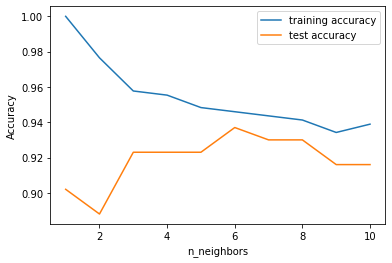

In [49]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
  clf.fit(X_train, y_train)
  
  # record training set accuracy 
  training_accuracy.append(clf.score(X_train, y_train)) 
  
  # record generalization accuracy 
  test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Naive-Bayes

Notebook with every snippet here: https://www.icorsi.ch/pluginfile.php/1137965/mod_folder/content/0/07_NaiveBayes_lesson.ipynb?forcedownload=1

### Probability Calculator (by Mr. Pala and Mr. Gübeli)

In [50]:
from fractions import Fraction


def get_prob_dict(column):
    return {i: Fraction(column.count(i), len(column)) for i in column}


def prob_given(column_a, column_b, a: str, b: str):
    count = 0
    for i in range(len(column_a)):
        if column_a[i] == a and column_b[i] == b:
            count += 1
    prob_dict = get_prob_dict(column_b)
    return Fraction(Fraction(count, len(column_a)), prob_dict[b])


def main():
    weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny',
               'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']
    temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool',
                   'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
    play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

    prob_weather = get_prob_dict(weather)
    prob_temperature = get_prob_dict(temperature)
    prob_play = get_prob_dict(play)

    for key, i in prob_weather.items():
        print(f"p({key}) = {i}")
    for key, i in prob_temperature.items():
        print(f"p({key}) = {i}")
    for key, i in prob_play.items():
        print(f"p({key}) = {i}")

    print(f"p(Sunny|Hot) = {prob_given(weather, temperature, 'Sunny', 'Hot')}")
    print(f"p(Hot|Sunny) = {prob_given(temperature, weather, 'Hot', 'Sunny')}")

    print(f"p(Play|Overcast,Mild) = {prob_given(weather, play, 'Overcast', 'Yes')*prob_given(temperature, play, 'Mild','Yes')*prob_play['Yes']}")
    print(f"p(No Play|Overcast,Mild) = {prob_given(weather, play, 'Overcast', 'No')*prob_given(temperature, play, 'Mild','No')*prob_play['No']}")


if __name__ == '__main__':
    main()

p(Sunny) = 5/14
p(Overcast) = 2/7
p(Rainy) = 5/14
p(Hot) = 2/7
p(Mild) = 3/7
p(Cool) = 2/7
p(No) = 5/14
p(Yes) = 9/14
p(Sunny|Hot) = 1/2
p(Hot|Sunny) = 2/5
p(Play|Overcast,Mild) = 8/63
p(No Play|Overcast,Mild) = 0


## Non Parametric Regression

In [57]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Based on this notebook: https://www.icorsi.ch/pluginfile.php/1137965/mod_folder/content/0/07_NaiveBayes_lesson.ipynb?forcedownload=1

In [59]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(df["sepal length (cm)"], data.target, test_size=0.33, random_state = 1)

### Piecewise Step Function

In [60]:
# Dividing the data into 4 bins
df_cut, bins = pd.cut(train_x, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(4.297, 5.15]    31
(5.15, 6.0]      28
(6.0, 6.85]      31
(6.85, 7.7]      10
Name: sepal length (cm), dtype: int64

We create cut points C1 , C2, . . . , Ck  in the range of X, and then construct K  + 1 new variables. For a given value of X, at most only one of C1, C2, . . ., CK  can be non-zero, as X can only lie in any one of the bins.

In [61]:
df_steps = pd.concat([train_x, df_cut, train_y], keys=['age','age_cuts','wage'], axis=1)

# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [63]:
import statsmodels.api as sm

# Fitting Generalised linear models
fit3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()

# Binning validation set into same 4 bins
bin_mapping = np.digitize(valid_x, bins) 
X_valid = pd.get_dummies(bin_mapping)

# Removing any outliers
X_valid = pd.get_dummies(bin_mapping).drop([5], axis=1)

# Prediction
pred2 = fit3.predict(X_valid)

NameError: name 'df_steps' is not defined

### Piecewise Polynomials

In [70]:
from patsy import dmatrix

# Generating cubic spline with 3 knots at 25, 40 and 60 (basis spline)
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit1 = sm.GLM(train_y, transformed_x).fit()

# Generating cubic spline with 4 knots
transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65),degree =3, include_intercept=False)", {"train": train_x}, return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit2 = sm.GLM(train_y, transformed_x2).fit()

# Predictions on both splines
pred1 = fit1.predict(dmatrix("bs(valid, knots=(25,40,60), include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(valid, knots=(25,40,50,65),degree =3, include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))

ValueError: some knot values ([25 40 60]) fall above upper bound (7.7)

Calculating RMSE

In [68]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms1 = sqrt(mean_squared_error(valid_y, pred1))
print(rms1)

rms2 = sqrt(mean_squared_error(valid_y, pred2))
print(rms2)

NameError: name 'pred1' is not defined

### Natural Spline

In [69]:
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": train_x}, return_type='dataframe')
fit3 = sm.GLM(train_y, transformed_x3).fit()

# Prediction on validation set
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": valid_x}, return_type='dataframe'))

# Calculating RMSE value
rms = sqrt(mean_squared_error(valid_y, pred3))
print(rms)

0.47837987212012
